In [1]:
!pip install pulp
!pip install folium
!pip install pandas

In [2]:
from TUinstance import *
from TerritorialUnit import *
from Determinist import *
from Stochastic import *
from Charts import *
from D_Demand import *
from Tsinimreted import *
from Robust import *
import random
import time
from copy import deepcopy

In [3]:
import random

def remove_random_tus(allocation, total_tus_count):

    # Calculate 10% of the total TUs
    tus_to_remove_count = int(total_tus_count * 0.10)
    
    # Flatten the allocation list while excluding district representatives
    all_tus = [tu for sublist in allocation.values() for tu in sublist if tu not in allocation.keys()]
    
    # Randomly select TUs to unassign, ensuring we don't select district reps
    tus_to_remove = random.sample(all_tus, tus_to_remove_count)
    
    # Remove the selected TUs from their current allocations
    for district_rep, tus in allocation.items():
        allocation[district_rep] = [tu for tu in tus if tu not in tus_to_remove]
    
    return allocation


def calculate_ratio(matrix):

    first_quartile_means = []

    # Iterate through each key in the distance matrix
    for key, distances in matrix.items():
        distance_values = list(distances.values())
        distance_values.sort()
        
        first_quartile_index = int(len(distance_values) * 0.25)
        
        first_quartile_distances = distance_values[:max(1, first_quartile_index)] 
        
        mean_first_quartile = np.mean(first_quartile_distances)
        
        first_quartile_means.append(mean_first_quartile)

    overall_mean = np.mean(first_quartile_means)

    return overall_mean

/Users/d0li/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Representatives :  [2, 9, 37, 87]
Representative 9: Territorial Units : 1, 5, 8, 9, 12, 13, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 40, 41, 48, 50, 53, 55, 59, 67, 68, 70, 79, 83, 84, 85, 92, 104, 113, 114, 115
Representative 2: Territorial Units : 2, 3, 4, 10, 14, 29, 39, 42, 44, 45, 47, 51, 52, 54, 56, 60, 61, 62, 63, 64, 65, 66, 72, 77, 91, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112
Representative 37: Territorial Units : 6, 11, 16, 17, 28, 37, 38, 43, 57, 58, 71, 78, 80, 81, 82, 86, 111, 116, 117, 118, 119, 120
Representative 87: Territorial Units : 7, 15, 18, 19, 20, 21, 22, 23, 35, 46, 49, 69, 73, 74, 75, 76, 87, 88, 89, 90, 93, 94, 95, 96
Representatives :  [10, 75, 86, 111]
Representative 10: Territorial Units : 1, 2, 3, 4, 8, 9, 10, 12, 13, 14, 24, 27, 29, 30, 31, 32, 34, 39, 40, 42, 44, 45, 47, 48, 51, 52, 54, 56, 60, 61, 62, 63, 64, 65, 66, 68, 70, 72, 77, 85, 91, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113
Representative 75: 

/Users/d0li/Nextcloud/IMT/Semestre 5/Initiation à la recherche/solver/Charts.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


SOLUTION FOR SCENARIO 1, BEST OF 1055961.4618725365, BEST ALLOC {9: [1, 4, 5, 8, 9, 12, 24, 27, 30, 31, 32, 33, 34, 40, 41, 44, 48, 50, 53, 59, 67, 68, 70, 77, 79, 83, 84, 85, 97, 104, 112, 113, 114, 115], 2: [2, 3, 10, 14, 29, 39, 42, 45, 47, 51, 52, 54, 56, 60, 61, 62, 63, 64, 65, 66, 72, 91, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110], 37: [6, 11, 13, 16, 17, 28, 36, 37, 38, 43, 55, 57, 58, 71, 78, 80, 81, 82, 86, 88, 111, 116, 117, 118, 119, 120], 87: [7, 15, 18, 19, 20, 21, 22, 23, 25, 26, 35, 46, 49, 69, 73, 74, 75, 76, 87, 89, 90, 92, 93, 94, 95, 96]}
Representatives :  [2, 9, 37, 87]
Representative 9: Territorial Units : 1, 5, 8, 9, 12, 13, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 40, 41, 48, 50, 53, 55, 59, 67, 68, 70, 79, 83, 84, 85, 92, 104, 113, 114, 115
Representative 2: Territorial Units : 2, 3, 4, 10, 14, 29, 39, 42, 44, 45, 47, 51, 52, 54, 56, 60, 61, 62, 63, 64, 65, 66, 72, 77, 91, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 112
Represent

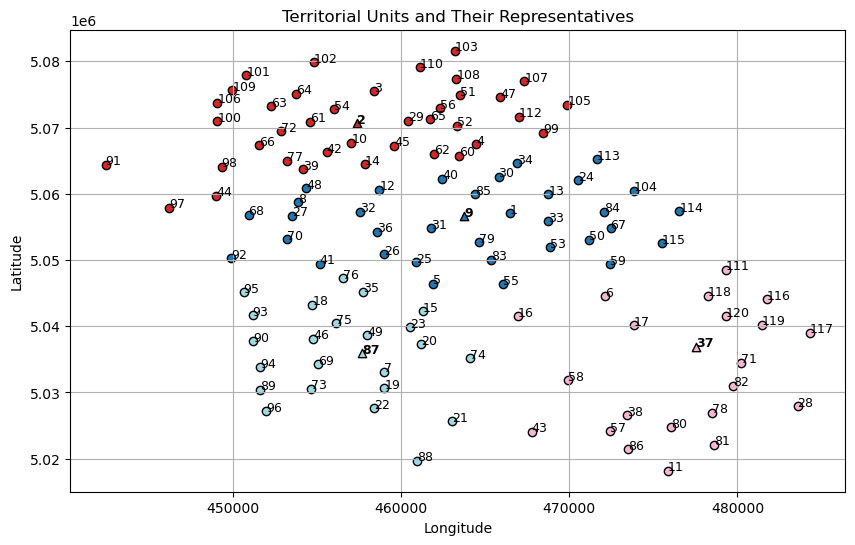

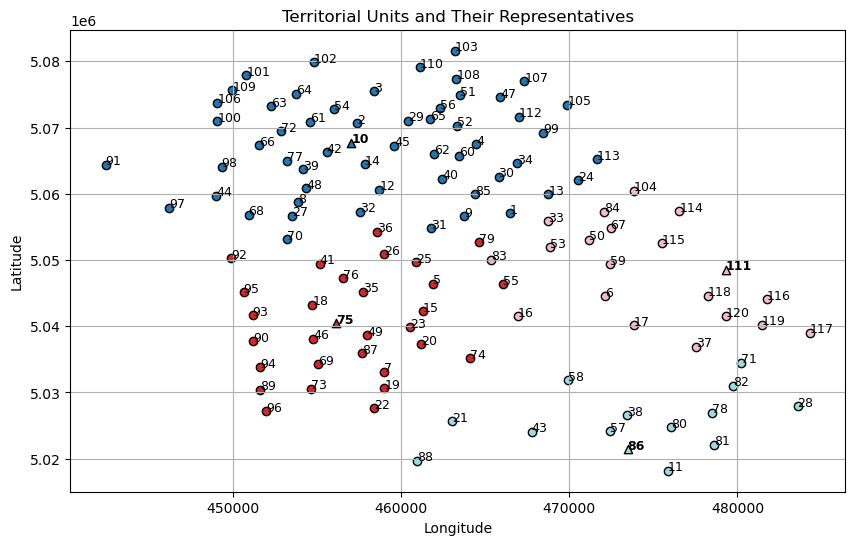

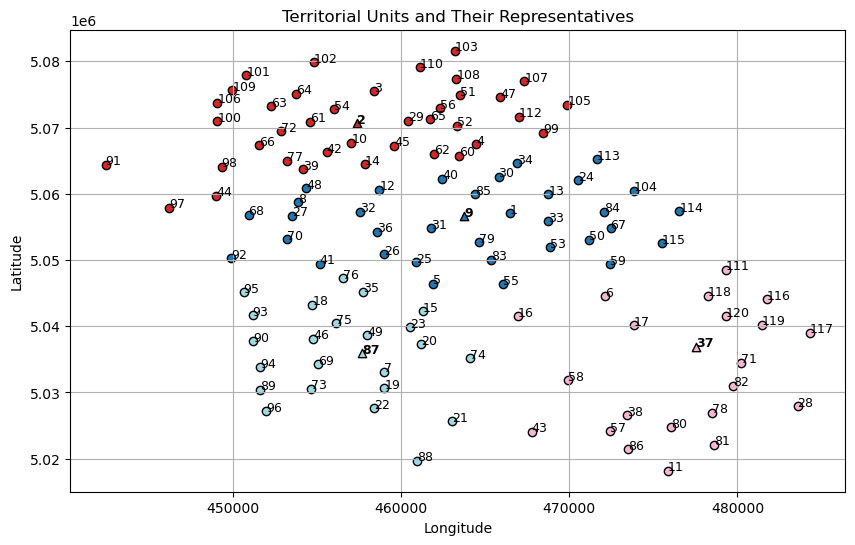

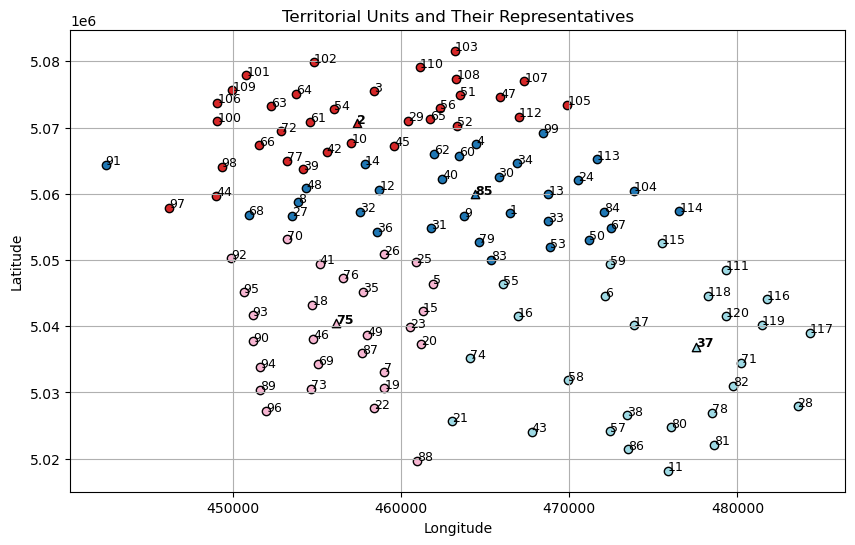

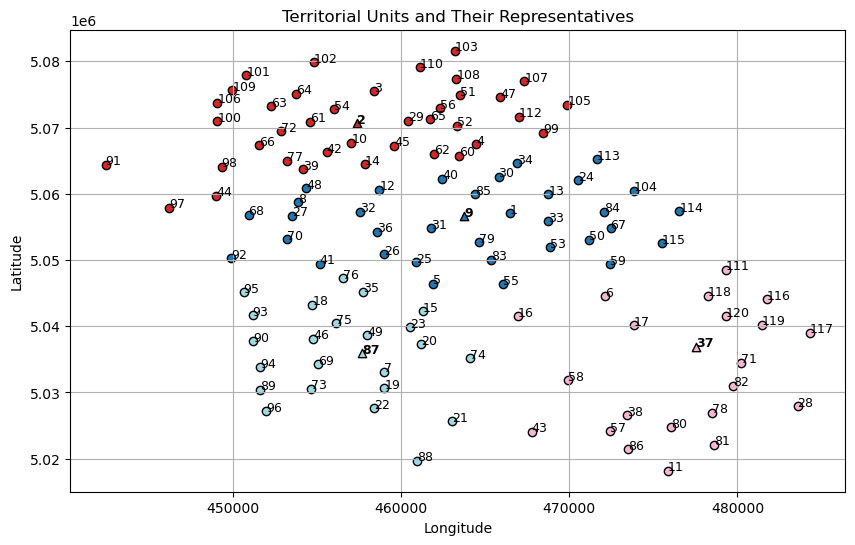

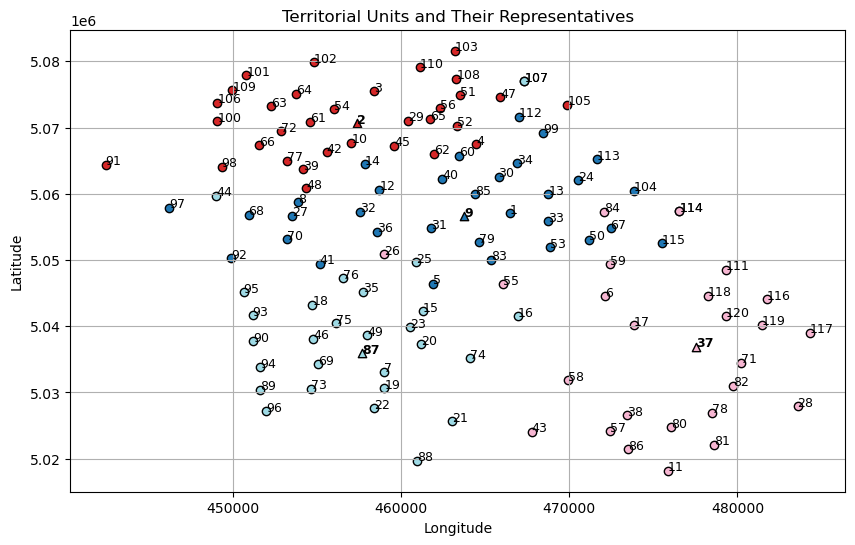

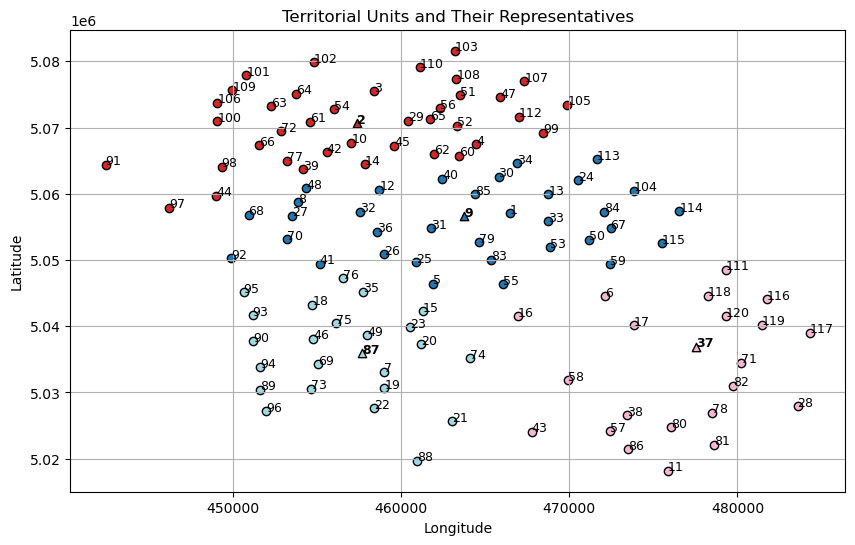

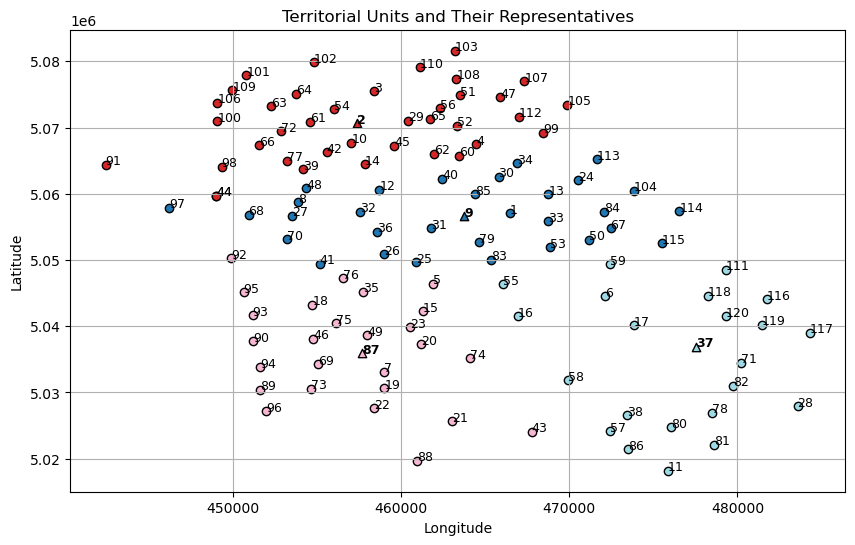

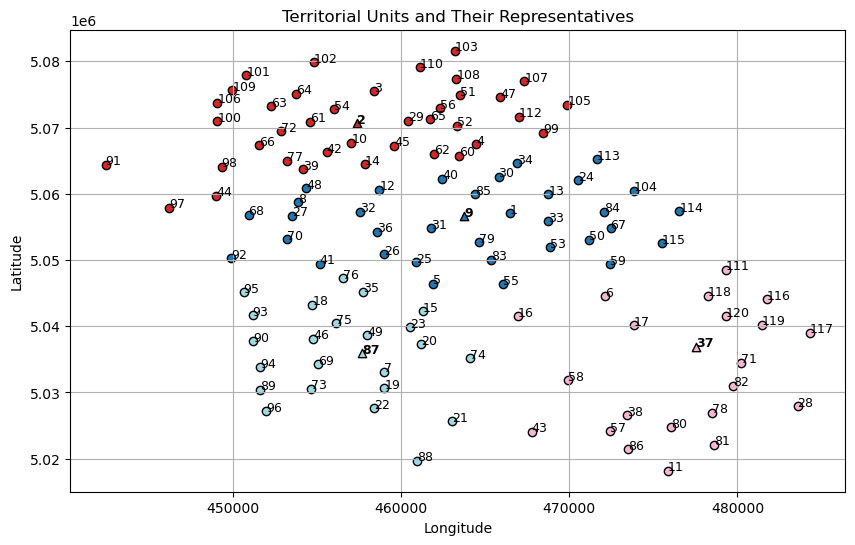

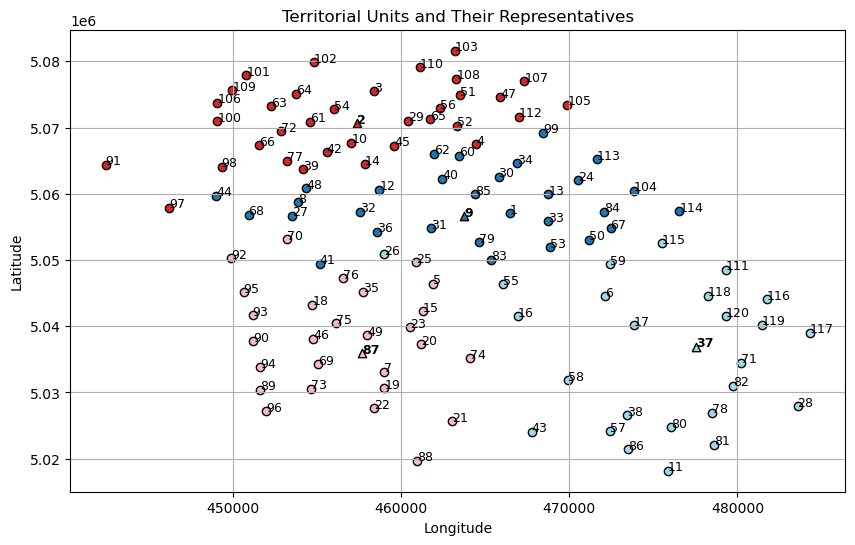

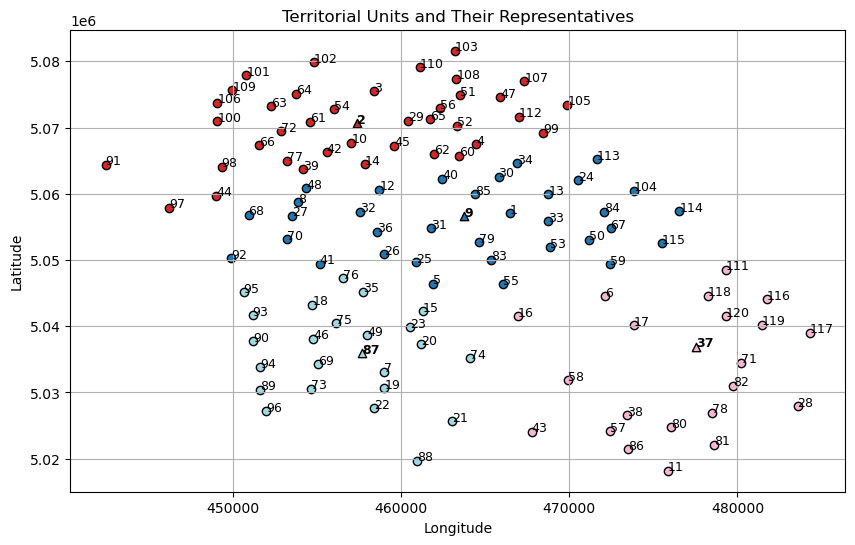

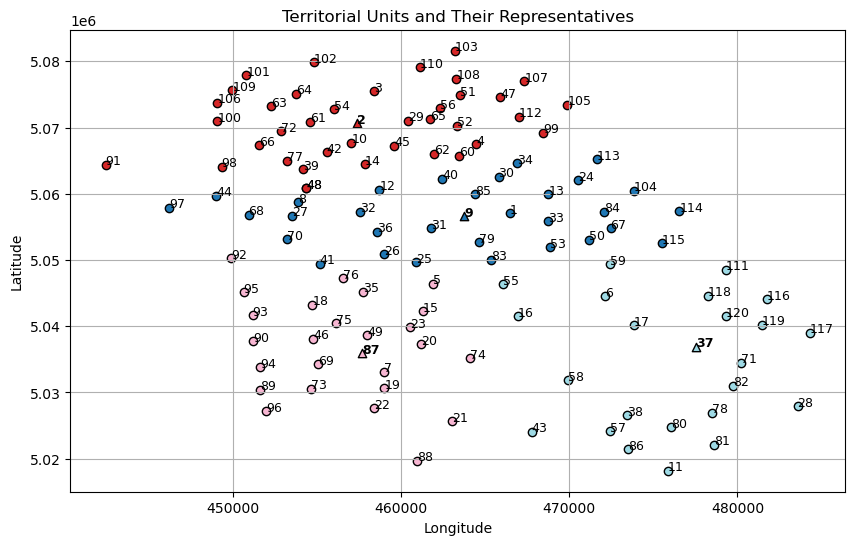

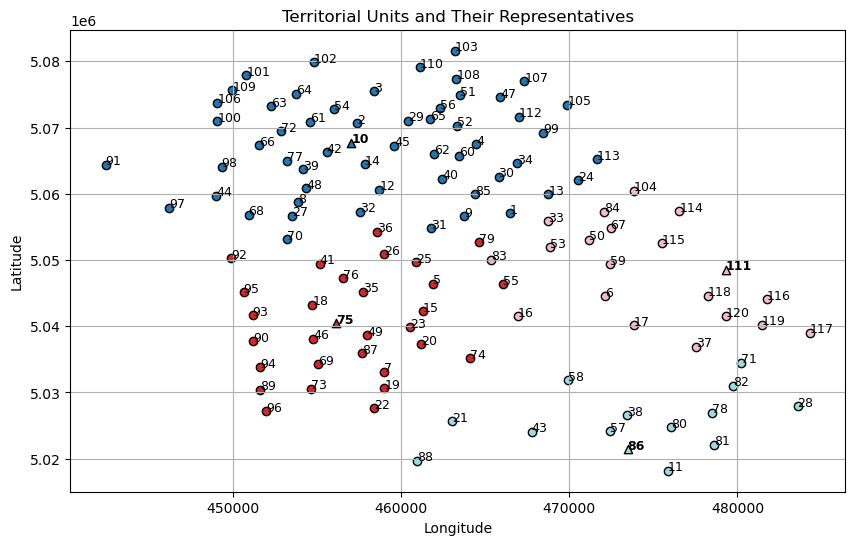

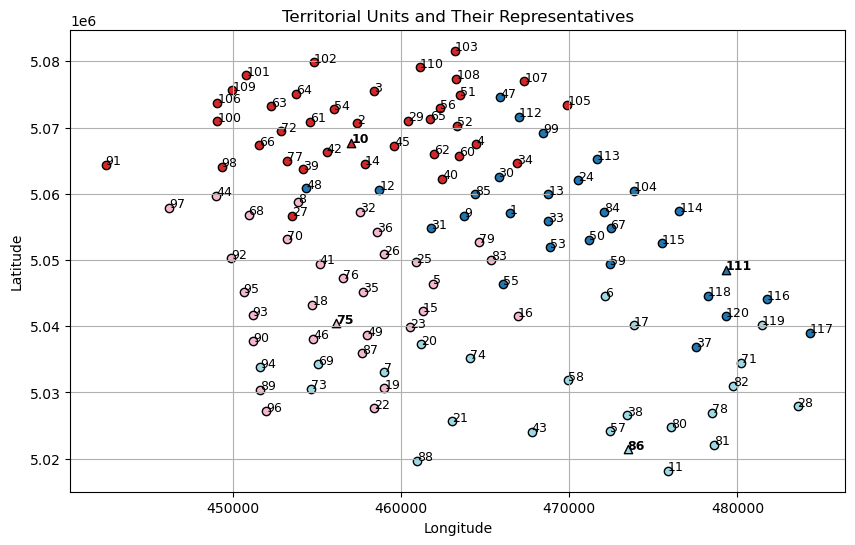

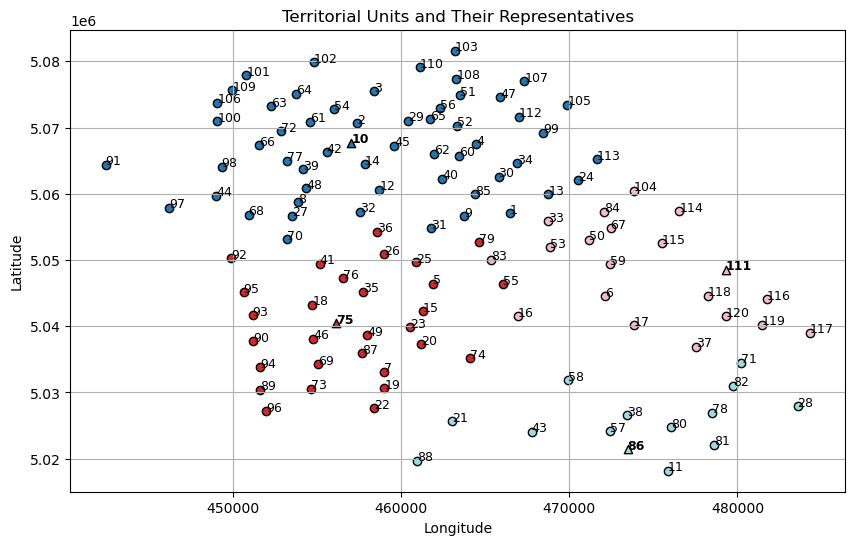

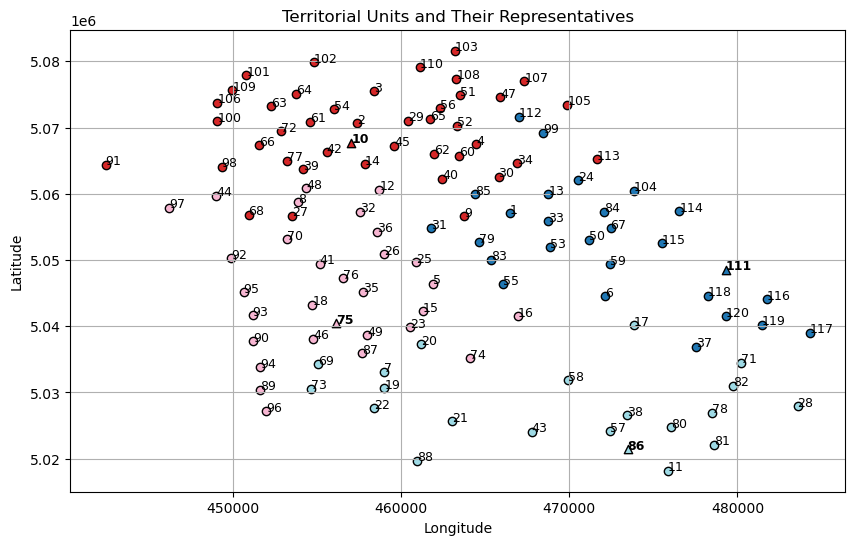

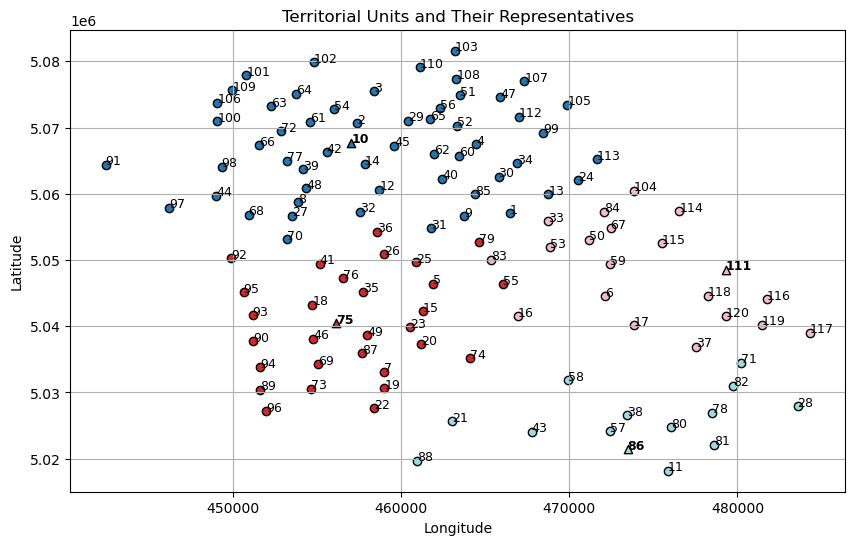

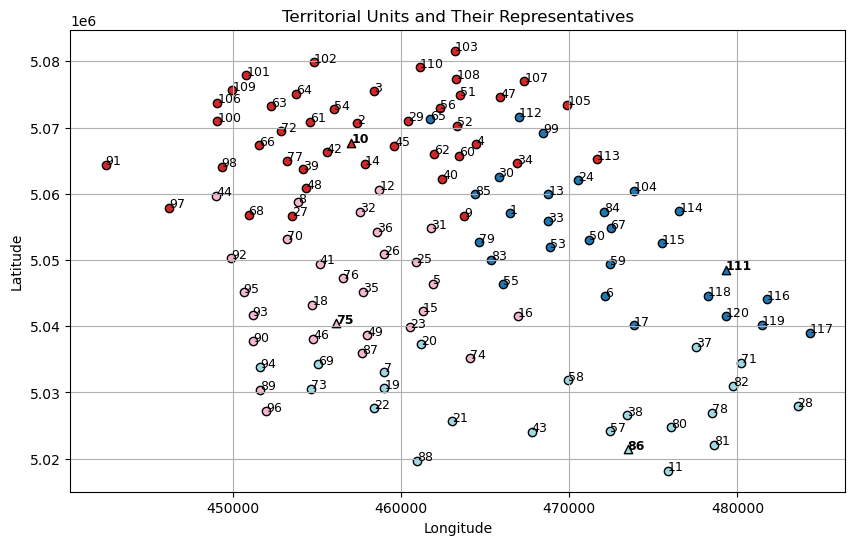

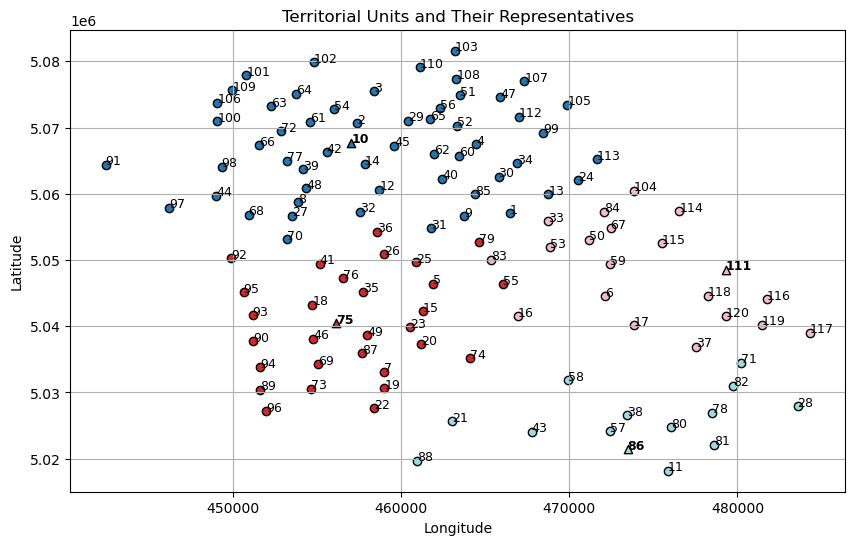

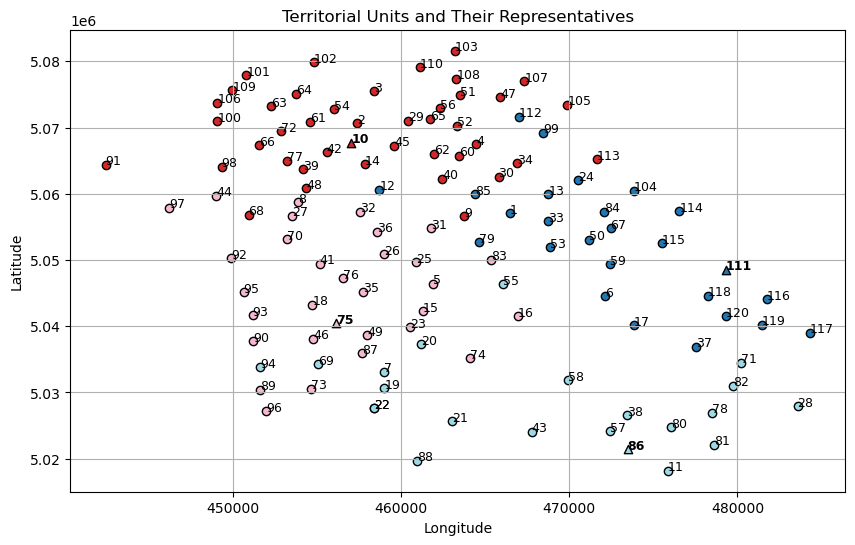

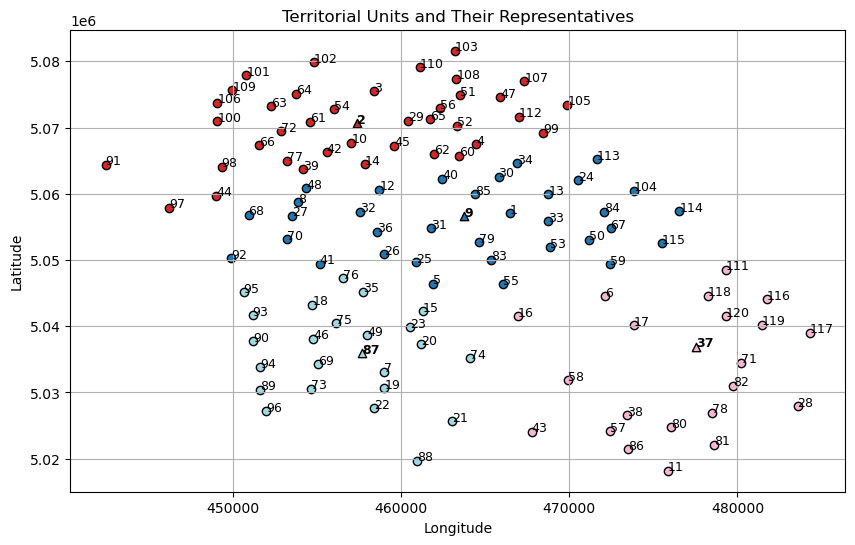

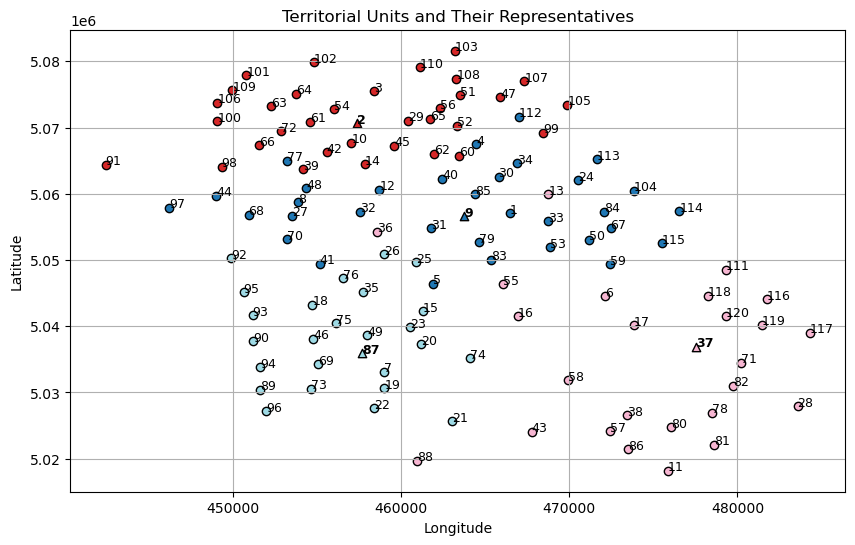

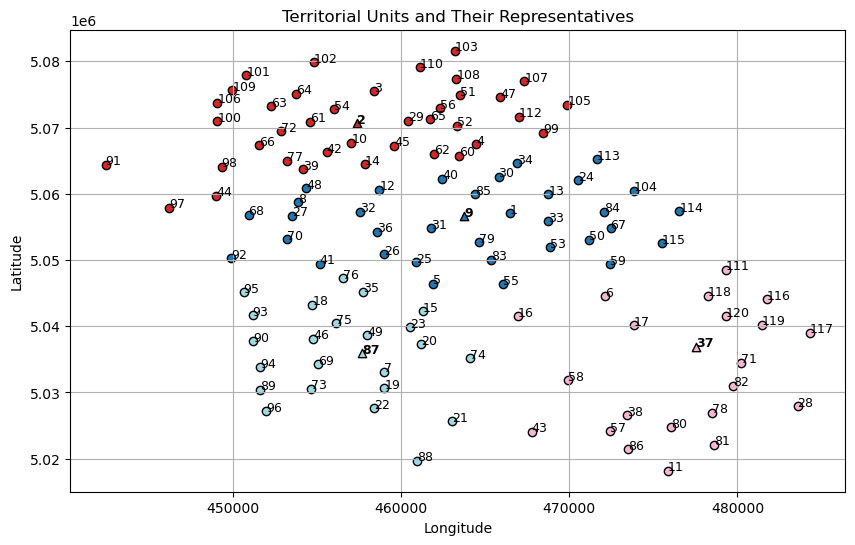

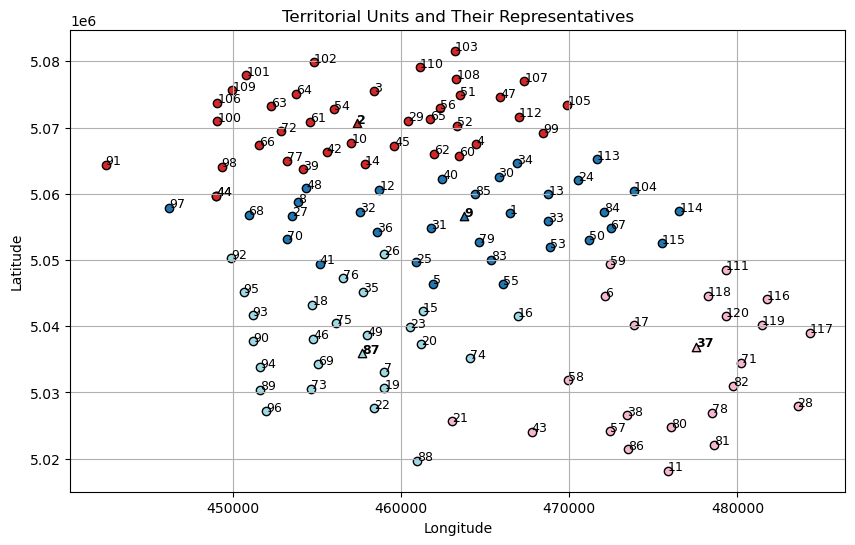

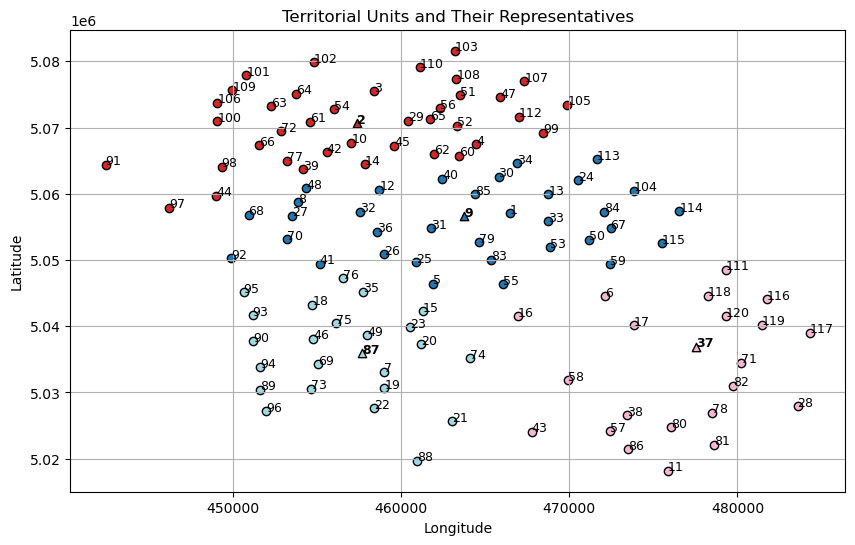

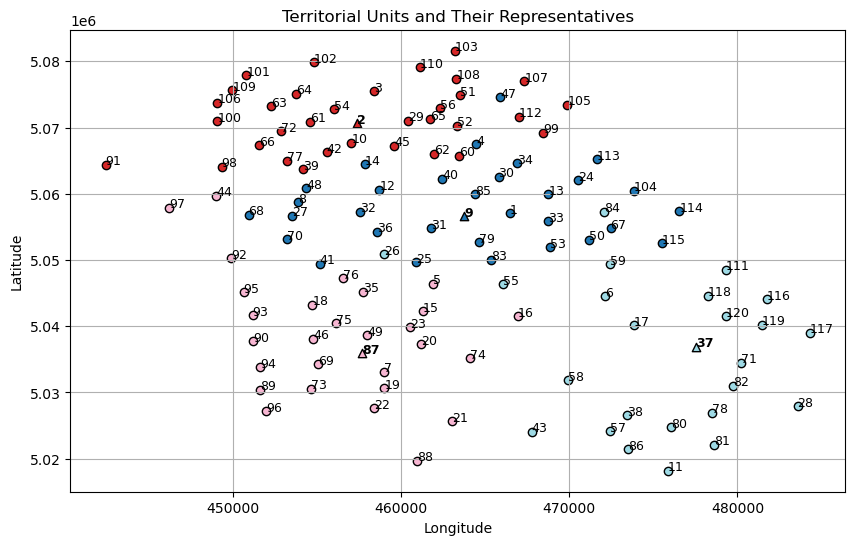

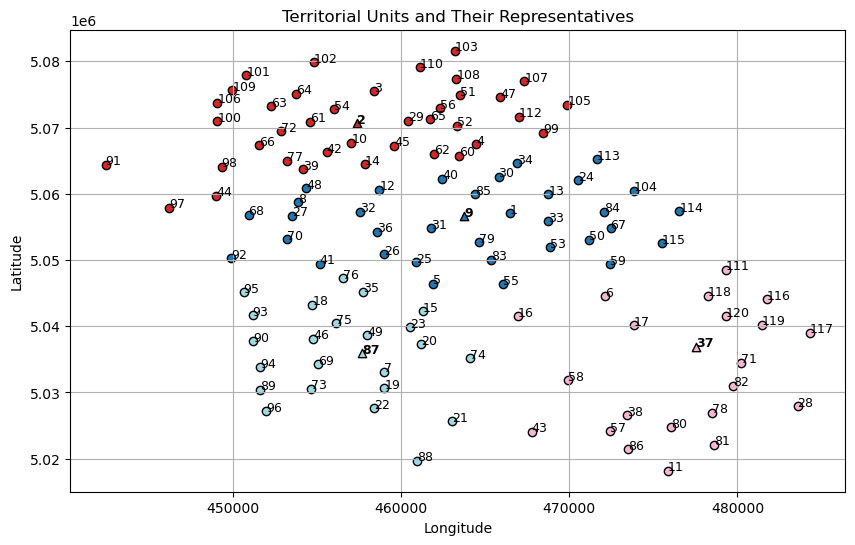

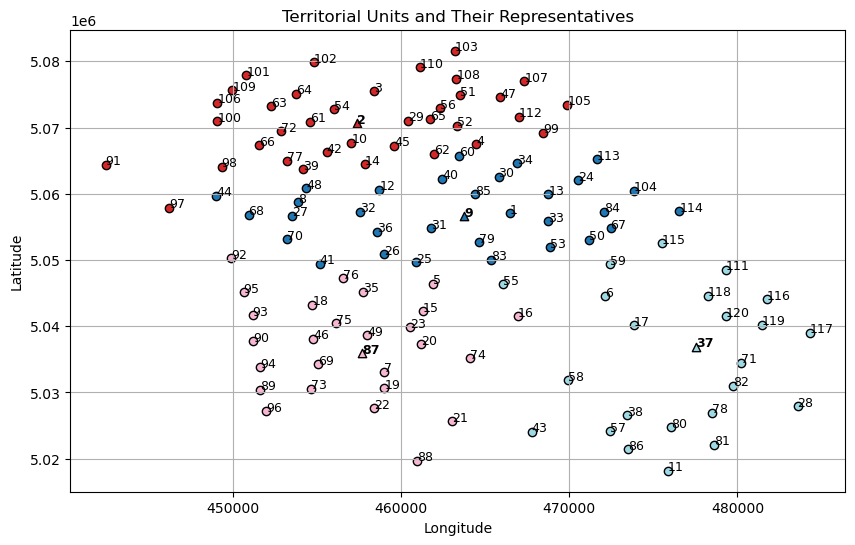

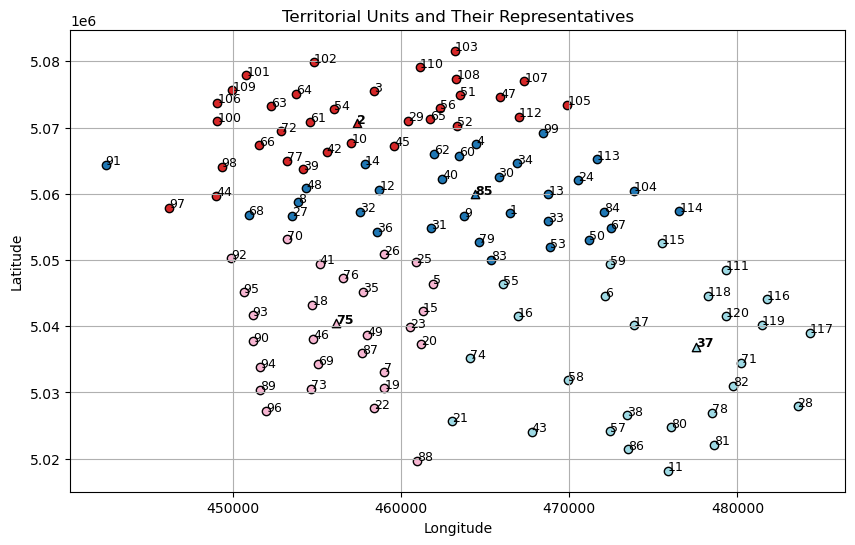

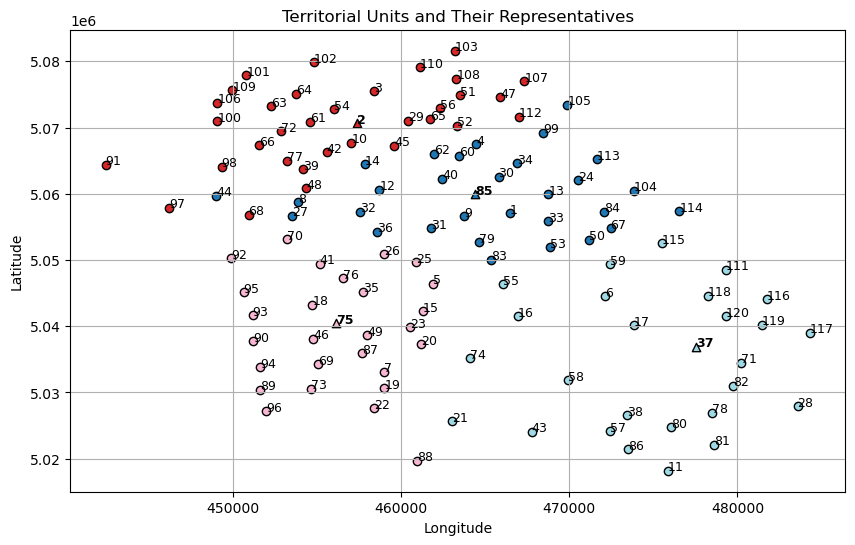

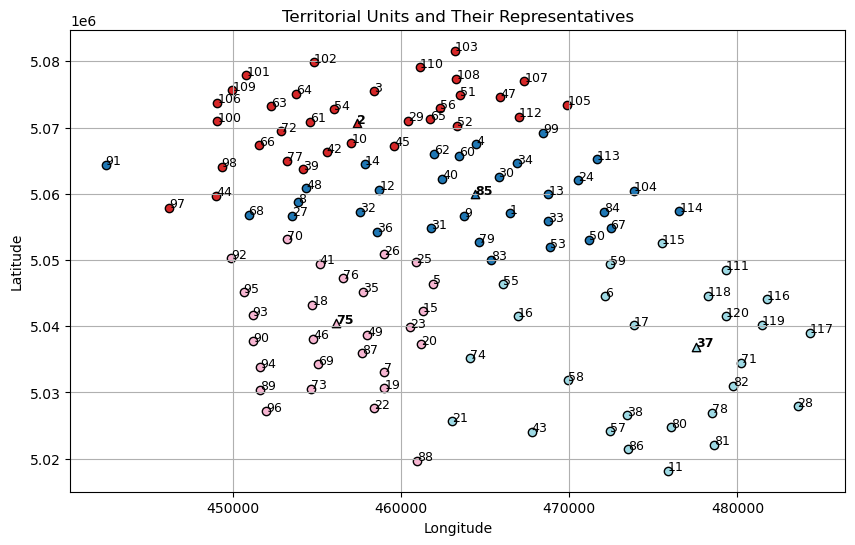

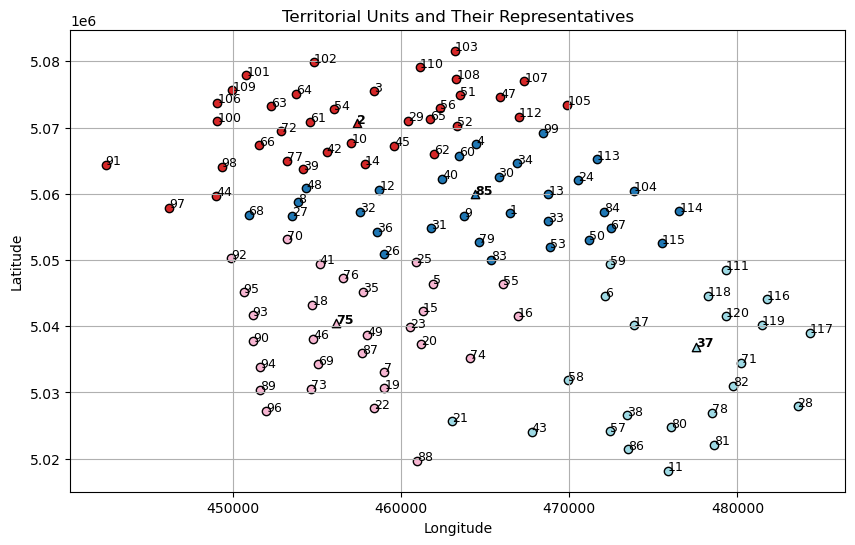

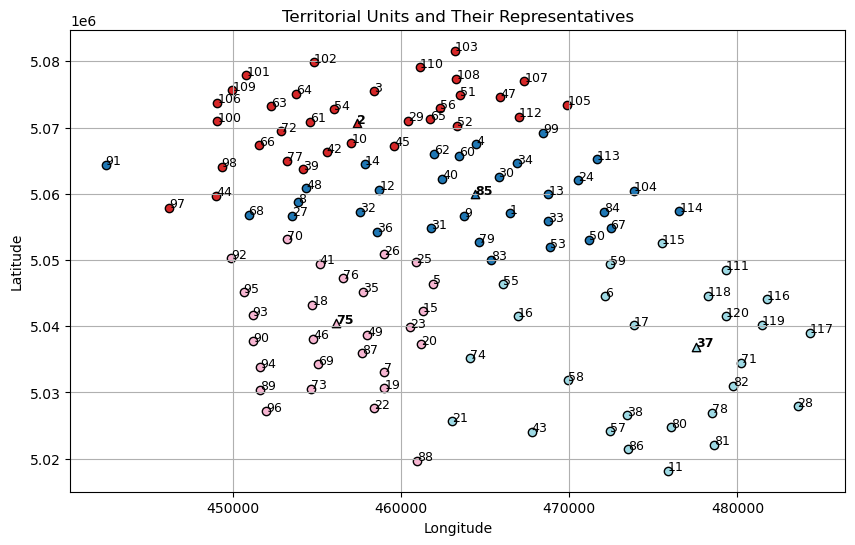

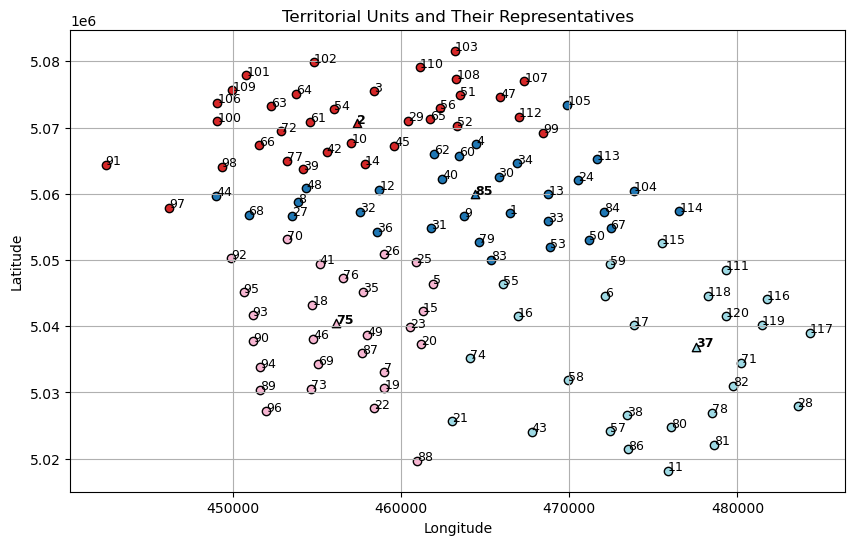

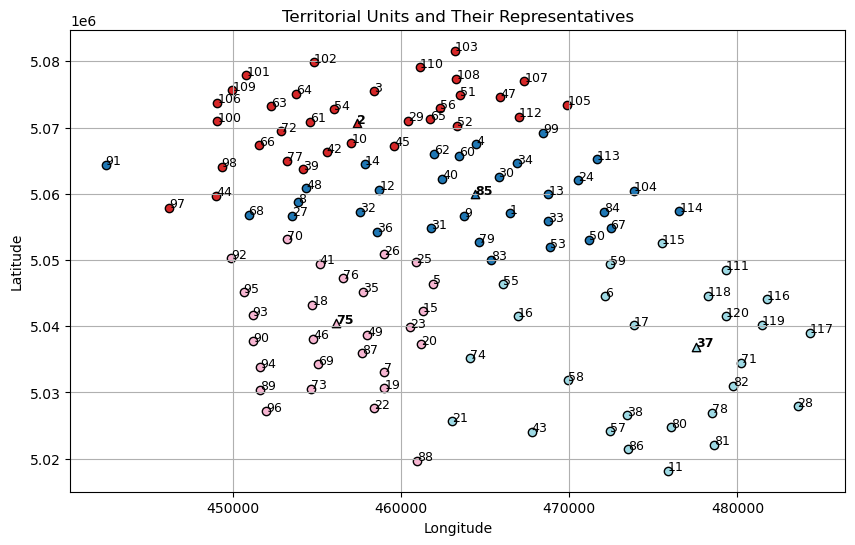

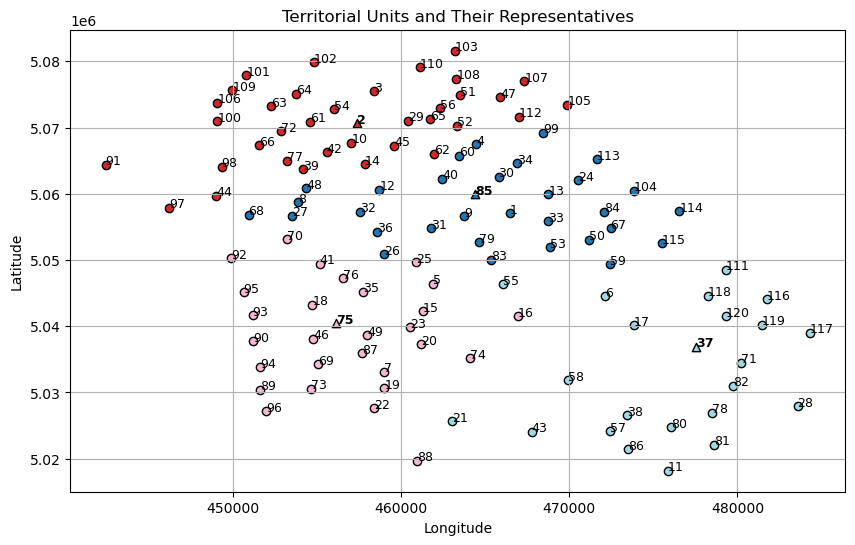

In [4]:
tu = TerritorialUnit()
tu.create_demand_dict(2)

# Districting with initial determinist method
det = Determinist(tu, 4, alpha=0.2, ouptut_message="DeterministFirst")
det.create_model()
det.solve_milp()
detsol = det.get_solution()
detsol.to_print_det()
chartsdetsol = Charts(detsol, tu, 0)
chartsdetsol.plot_solution_det(show=False)

# Districting by only considering demand
dDemand = D_Demand(tu, 4, ouptut_message="D_DemandFirst")
dDemand.create_model()
dDemand.solve_milp()
dDemandSol = dDemand.get_solution()
dDemandSol.to_print_det()
chartsdDemandSol = Charts(dDemandSol, tu, 0)
chartsdDemandSol.plot_solution_det(show=False)

# Districting with Robust method
robust = Robust(tu=tu, p=4, alpha=0.2, high_demand_factor=1.2, low_demand_factor=0.8, ouptut_message="RobustFirst")
robust.create_model()
robust.solve_milp()
robustSol = robust.get_solution()
robustSol.to_print_det()
chartsrobustSol = Charts(robustSol, tu, 0)
chartsrobustSol.plot_solution_det(show=False)

# Districting with custom determinist weight method
invDet = Tsinimreted(tu, 4, ouptut_message="InverseDeterministFirst")
invDet.create_model()
invDet.solve_milp()
invDetSol = invDet.get_solution()
invDetSol.to_print_det()
chartsinvDetSol = Charts(invDetSol, tu, 0)
chartsinvDetSol.plot_solution_det(show=False)

all_solutions = {}
nb_iteration = 200

for alloc, alloc_type in zip((detsol, dDemandSol, robustSol, invDetSol),
                             ('Determinist', 'D_Demand', 'Robust', 'InverseDeterminist')):

    if(alloc == detsol):
        message = "StochfromDetSolInit"
        message2 = "StochfromDetSolBest"
    if(alloc == dDemandSol):
        message = "StochfromDDemandSolInit"
        message2 = "StochfromDDemandSolBest"
    if(alloc == robustSol):
        message = "StochfromRobustSolInit"
        message2 = "StochfromRobustSolBest"
    if(alloc == invDetSol):
        message = "StochfromInvDetSolInit"    
        message2 = "StochfromInvDetSolBest"

    all_solutions[alloc_type] = {}
        
    for s in (1,2,3,4):

        all_solutions[alloc_type][s] = {}

        init_alloc = alloc.get_tu_association()
        best_alloc = init_alloc
        best_of = float('inf')
        

        # Solve without redistricting
        detSolverStoch = None
        detSolverStoch = Stochastic(tu=tu, p=4, alpha=0.2, alloc=init_alloc, scenario=s, ouptut_message=message)
        detSolverStoch.create_model()
        detSolverStoch.solve_milp()
        detSolverStochSol = detSolverStoch.get_solution()
        detSolverStochSol.to_print_det()
        chartsdetSolverStochSol = Charts(detSolverStochSol, tu, 0, s)
        chartsdetSolverStochSol.plot_solution_det(show=False)

        all_solutions[alloc_type][s]['init'] = detSolverStochSol

        bestSol = detSolverStochSol

        i = 0
        solList = []
        allValues = []

        # Solve with Redistricting

        while(i < nb_iteration):

            detSolverStoch = None
            best_alloc_copy = deepcopy(best_alloc)
            current_alloc = remove_random_tus(best_alloc_copy, len(tu.get_all_ids()))

            detSolverStoch = Stochastic(tu=tu, p=4, alpha=0.2, alloc=current_alloc, scenario=s, ouptut_message=message2)
            detSolverStoch.create_model()

            detSolverStoch.solve_milp()

            # Get the solution
            detSolStoch = detSolverStoch.get_solution()
            #print(detSolStoch.get_of())
            if(detSolStoch.get_of() != None and detSolStoch.get_of() < best_of * 1.1):
                best_of = detSolStoch.get_of()
                best_alloc = detSolStoch.get_tu_association()

                if (best_of < bestSol.get_of() or bestSol == None)  :
                    bestSol = detSolStoch
                    solList.append((i, bestSol.get_of()))
            
            if(detSolStoch.get_of() != None) :
                allValues.append((i, bestSol.get_of()))

            i += 1
        
        

        print(f"SOLUTION FOR SCENARIO {s}, BEST OF {bestSol.get_of()}, BEST ALLOC {bestSol.get_tu_association()}")
        chartsStoch = Charts(bestSol, tu, None, s)
        chartsStoch.plot_solution_det(show=False)

        all_solutions[alloc_type][s]['best'] = bestSol
        all_solutions[alloc_type][s]['solList'] = solList
        all_solutions[alloc_type][s]['allValues'] = solList



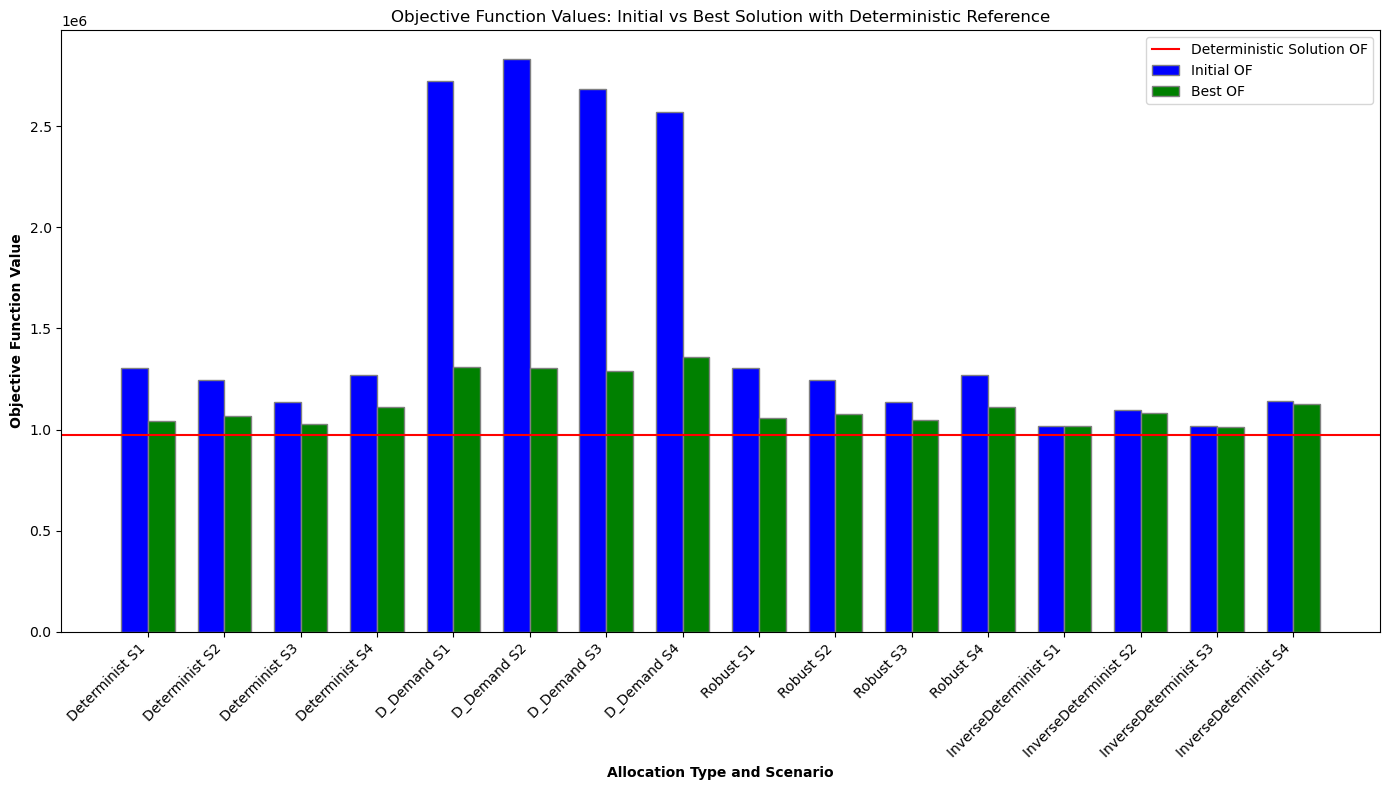

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data storage
categories = []  # Allocation types and scenarios
initial_of_values = []
best_of_values = []

# Extract data
for alloc_type, scenarios in all_solutions.items():
    for scenario, data in scenarios.items():
        categories.append(f"{alloc_type} S{scenario}")
        initial_of_values.append(data['init'].get_of())
        best_of_values.append(data['best'].get_of())


# Assuming detsol.get_of() gives you the objective function value you want to use as a reference
reference_of_value = detsol.get_of()

# Continue with your plotting setup
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate positions for the bars
barWidth = 0.35
r1 = np.arange(len(initial_of_values))
r2 = [x + barWidth for x in r1]

# Plotting the bars for initial and best OF values
ax.bar(r1, initial_of_values, color='b', width=barWidth, edgecolor='grey', label='Initial OF')
ax.bar(r2, best_of_values, color='g', width=barWidth, edgecolor='grey', label='Best OF')

# Adding the reference line for the deterministic solution's OF value
ax.axhline(y=reference_of_value, color='r', linestyle='-', label='Deterministic Solution OF')

# Adjusting the x-axis labels, title, and legend
ax.set_xlabel('Allocation Type and Scenario', fontweight='bold')
ax.set_ylabel('Objective Function Value', fontweight='bold')
ax.set_xticks([r + barWidth/2 for r in range(len(initial_of_values))])
ax.set_xticklabels(categories, rotation=45, ha="right")

ax.legend()
plt.title('Objective Function Values: Initial vs Best Solution with Deterministic Reference')
plt.tight_layout()
plt.show()



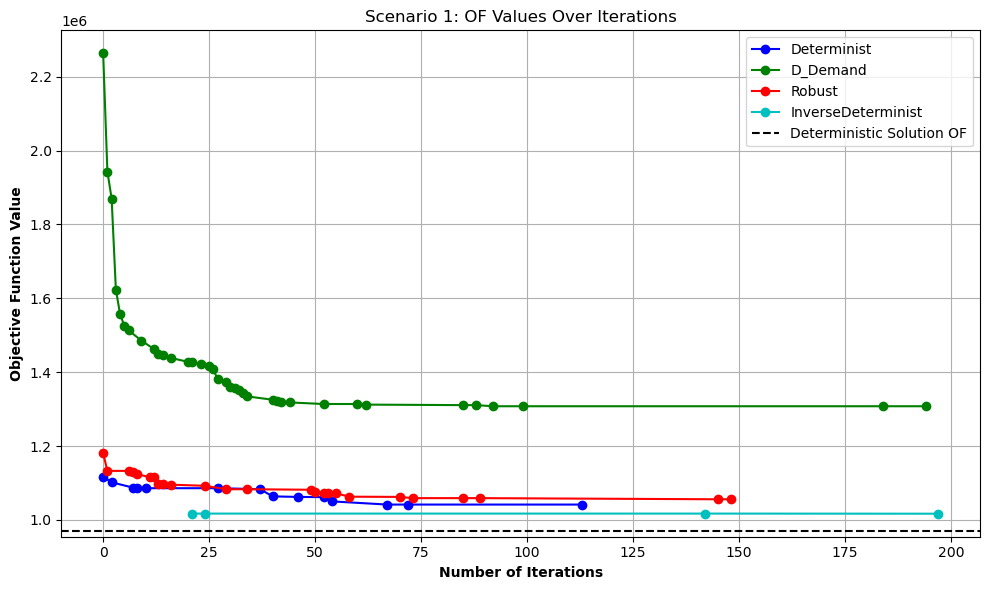

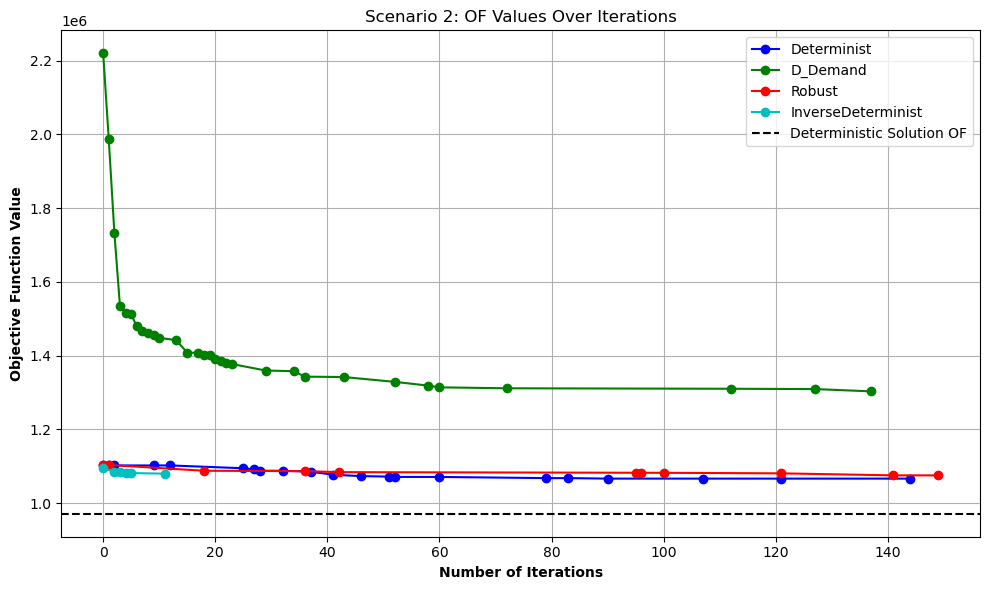

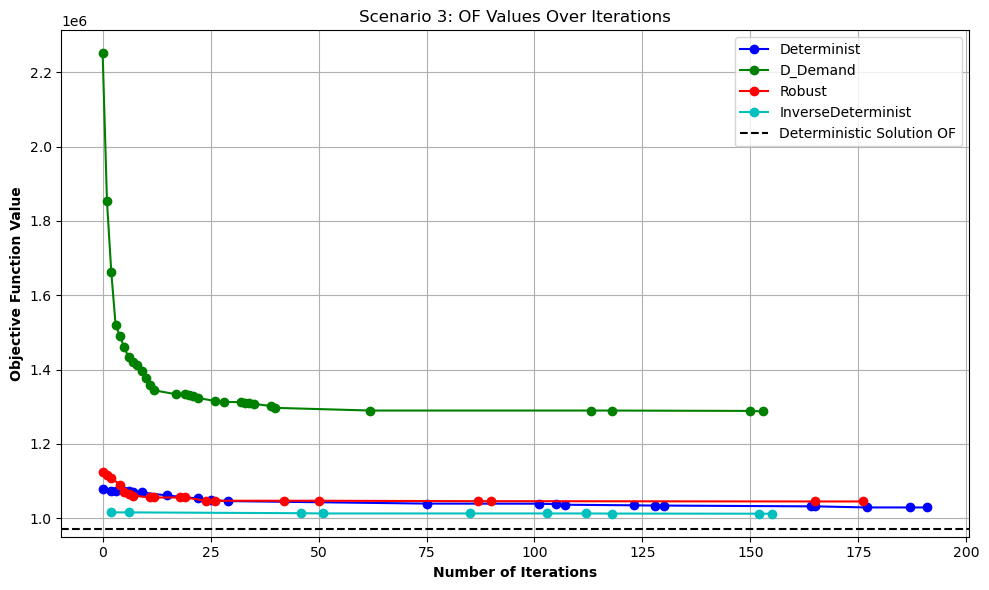

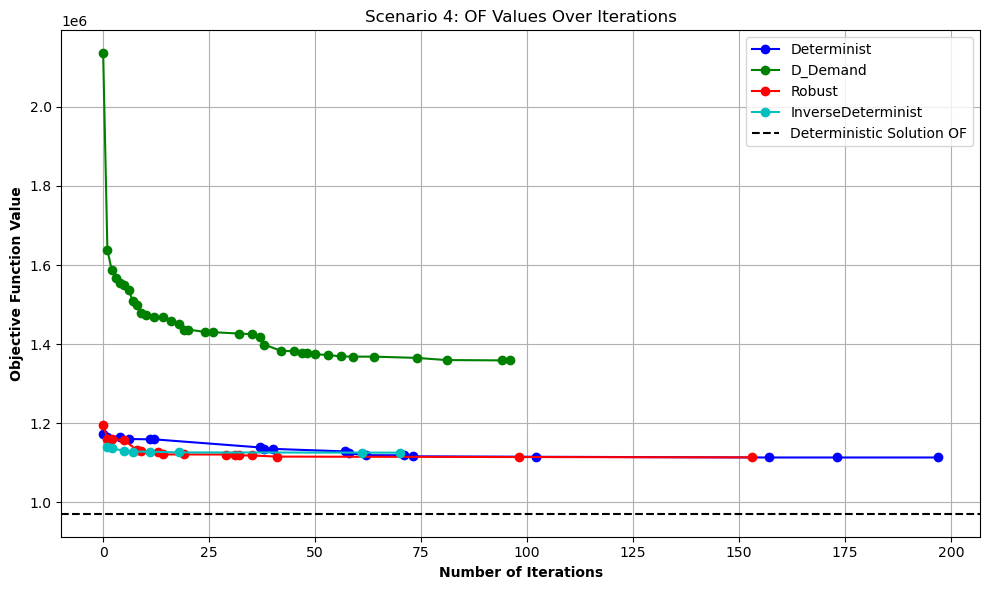

In [6]:
# Assuming all_solutions is your nested dictionary and detsol.get_of() gives the reference OF value
reference_of_value = detsol.get_of()

# Plot settings
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 allocation types
alloc_types = list(all_solutions.keys())

# Iterate over each scenario to create a separate plot
for scenario in range(1, 5):  # Assuming scenarios are numbered 1 through 4
    plt.figure(figsize=(10, 6))
    
    for idx, alloc_type in enumerate(alloc_types):
        # Get the initial OF value
        initial_of = all_solutions[alloc_type][scenario]['init'].get_of()
        
        # Extract solList for the current allocation type and scenario
        solList = all_solutions[alloc_type][scenario]['solList']
        
        # Unzip the solList tuples into two lists: iterations (x) and OF values (y), then prepend the initial OF value
        iterations, of_values = zip(*solList)
        iterations = [0] + [iteration + 1 for iteration in iterations]  # Offset x-axis by 1
        of_values = [initial_of] + list(of_values)  # Prepend with initial OF
        
        # Plotting
        plt.plot(iterations, of_values, color=colors[idx], marker='o', linestyle='-', label=alloc_type)
    
    # Adding the reference line for the deterministic solution's OF value
    plt.axhline(y=reference_of_value, color='k', linestyle='--', label='Deterministic Solution OF')
    
    # Adjusting the plot
    plt.xlabel('Number of Iterations', fontweight='bold')
    plt.ylabel('Objective Function Value', fontweight='bold')
    plt.title(f'Scenario {scenario}: OF Values Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show plot
    plt.show()


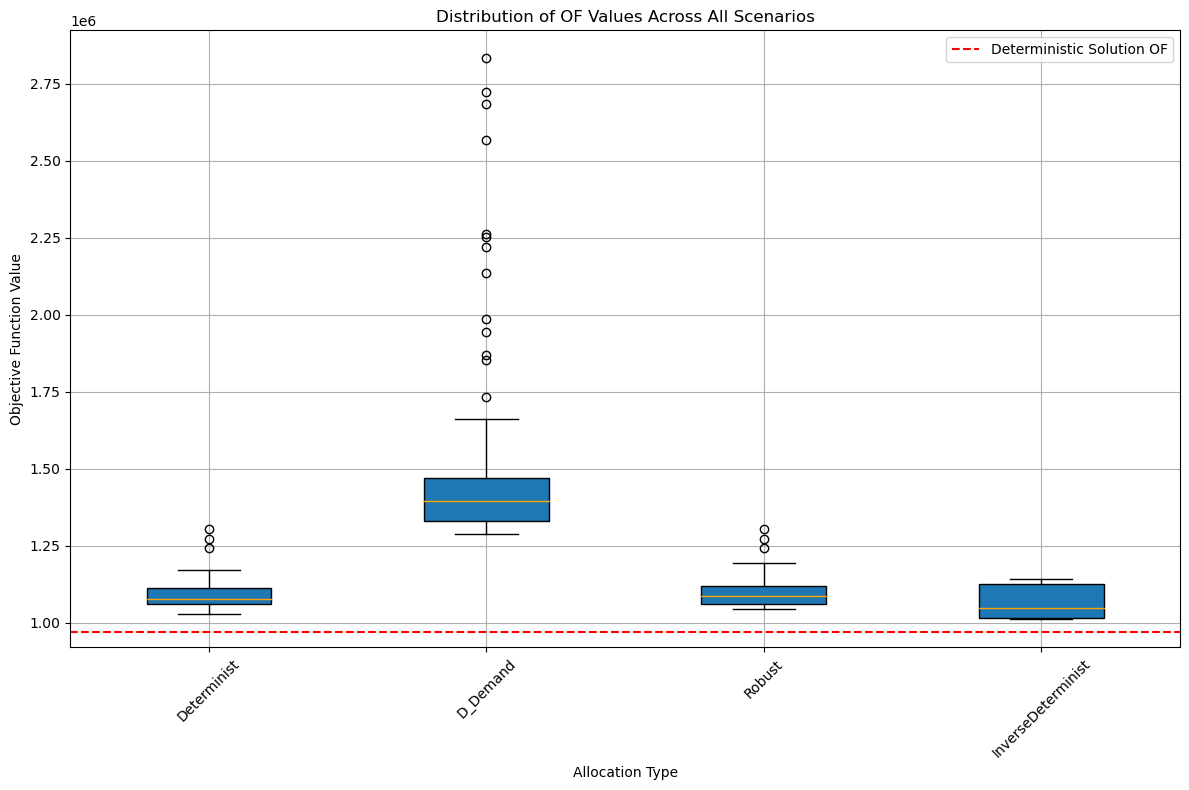

In [7]:
import matplotlib.pyplot as plt

# Assuming all_solutions is your nested dictionary and detsol.get_of() gives the reference OF value
reference_of_value = detsol.get_of()

# Prepare data for box plots
data_to_plot = []  # Holds lists of OF values for each allocation type, aggregated across all scenarios
labels = []  # Labels for each allocation type

# Collect data for each allocation type, across all scenarios
for alloc_type in alloc_types:
    aggregated_of_values = []  # Aggregate OF values for this allocation type across all scenarios
    
    # Iterate through each scenario to collect OF values
    for scenario in all_solutions[alloc_type].keys():
        # Add the initial OF value
        initial_of = all_solutions[alloc_type][scenario]['init'].get_of()
        aggregated_of_values.append(initial_of)
        
        # Extend the list with OF values from solList for the current scenario
        solList_values = [value for _, value in all_solutions[alloc_type][scenario]['allValues']]
        aggregated_of_values.extend(solList_values)
    
    # Add the compiled list of aggregated OF values to our data to plot
    data_to_plot.append(aggregated_of_values)
    labels.append(alloc_type)  # Add label for the current allocation type

# Creating the box plot
plt.figure(figsize=(12, 8))
bp = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, medianprops={'color':'orange'})
plt.title('Distribution of OF Values Across All Scenarios')
plt.ylabel('Objective Function Value')
plt.xlabel('Allocation Type')
plt.xticks(rotation=45)

# Adding the reference line for the deterministic solution's OF value
plt.axhline(y=reference_of_value, color='r', linestyle='--', label='Deterministic Solution OF')

plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
for alloc_type in all_solutions:
    print(f"Allocation Type: {alloc_type}")
    for scenario in all_solutions[alloc_type]:
        init_solution = all_solutions[alloc_type][scenario]['init']
        init_of = init_solution.get_of() if init_solution.get_of() is not None else "No value"
        print(f"  Scenario {scenario}: Initial OF = {init_of}")


Allocation Type: Determinist
  Scenario 1: Initial OF = 1303846.100839317
  Scenario 2: Initial OF = 1242574.98973265
  Scenario 3: Initial OF = 1137566.1008426505
  Scenario 4: Initial OF = 1270929.4341793174
Allocation Type: D_Demand
  Scenario 1: Initial OF = 2723379.4093712904
  Scenario 2: Initial OF = 2832227.7427179576
  Scenario 3: Initial OF = 2684857.742717957
  Scenario 4: Initial OF = 2567829.409384625
Allocation Type: Robust
  Scenario 1: Initial OF = 1303846.100839317
  Scenario 2: Initial OF = 1242574.98973265
  Scenario 3: Initial OF = 1137566.1008426505
  Scenario 4: Initial OF = 1270929.4341793174
Allocation Type: InverseDeterminist
  Scenario 1: Initial OF = 1017638.8923470167
  Scenario 2: Initial OF = 1098524.4479070168
  Scenario 3: Initial OF = 1015380.5590170169
  Scenario 4: Initial OF = 1141183.3367936835
